In [1]:
import json
import numpy as np
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as plt

from csc.mmp import *
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *

# Atom parameters
bmin = 0.005
bmax = 0.60
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.01
ymax = 0.034
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 1428 different atoms


In [2]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_signals_{batchSize}.json'
path_to_omp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_omp_{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

# Create a ``MMPTree`` for a given signal

In [3]:
signal_dict = workbench.signalDictFromId(id=1876)
signal = signal_dict['signal']
mmp_tree = MMPTree(dictionary, signal, sparsity=3, connections=3)

In [4]:
mmp_tree.runMMPDF(branches_number=10, verbose=True)


BRANCH n°1 exploring path : (1, 1, 1)
    NEW MMPNode : ROOT  +  Node(1)
    NEW MMPNode : ROOT -> 1  +  Node(1)
    NEW MMPNode : ROOT -> 1 -> 1  +  Node(1)

BRANCH n°2 exploring path : (2, 1, 1)
    NEW MMPNode : ROOT  +  Node(2)
    NEW MMPNode : ROOT -> 2  +  Node(1)
    NEW MMPNode : ROOT -> 2 -> 1  +  Node(1)

BRANCH n°3 exploring path : (3, 1, 1)
    NEW MMPNode : ROOT  +  Node(3)
    NEW MMPNode : ROOT -> 3  +  Node(1)
    NEW MMPNode : ROOT -> 3 -> 1  +  Node(1)

BRANCH n°4 exploring path : (1, 2, 1)
   ~~ Using MMPNode (ROOT -> 1) ~~
    NEW MMPNode : ROOT -> 1  +  Node(2)
    NEW MMPNode : ROOT -> 1 -> 2  +  Node(1)

BRANCH n°5 exploring path : (2, 2, 1)
   ~~ Using MMPNode (ROOT -> 2) ~~
    NEW MMPNode : ROOT -> 2  +  Node(2)
    NEW MMPNode : ROOT -> 2 -> 2  +  Node(1)

BRANCH n°6 exploring path : (3, 2, 1)
   ~~ Using MMPNode (ROOT -> 3) ~~
    NEW MMPNode : ROOT -> 3  +  Node(2)
    NEW MMPNode : ROOT -> 3 -> 2  +  Node(1)

BRANCH n°7 exploring path : (1, 3, 1)
   ~~ U

In [5]:
mmp_tree.printLeaves()

Branch n°1 leaf with MSE = 0.0004051687768090662
Branch n°2 leaf with MSE = 0.00011995533928115535
Branch n°3 leaf with MSE = 0.0001194933046605595
Branch n°4 leaf with MSE = 0.00044260426138311847
Branch n°5 leaf with MSE = 0.00011995533928115535
Branch n°6 leaf with MSE = 0.00011949330466055955
Branch n°7 leaf with MSE = 0.000521771726062924
Branch n°8 leaf with MSE = 0.0002726837173337085
Branch n°9 leaf with MSE = 0.0004539997387224255
Branch n°10 leaf with MSE = 0.0004177928156980351
Branch n°11 leaf with MSE = 0.00026989294789459185


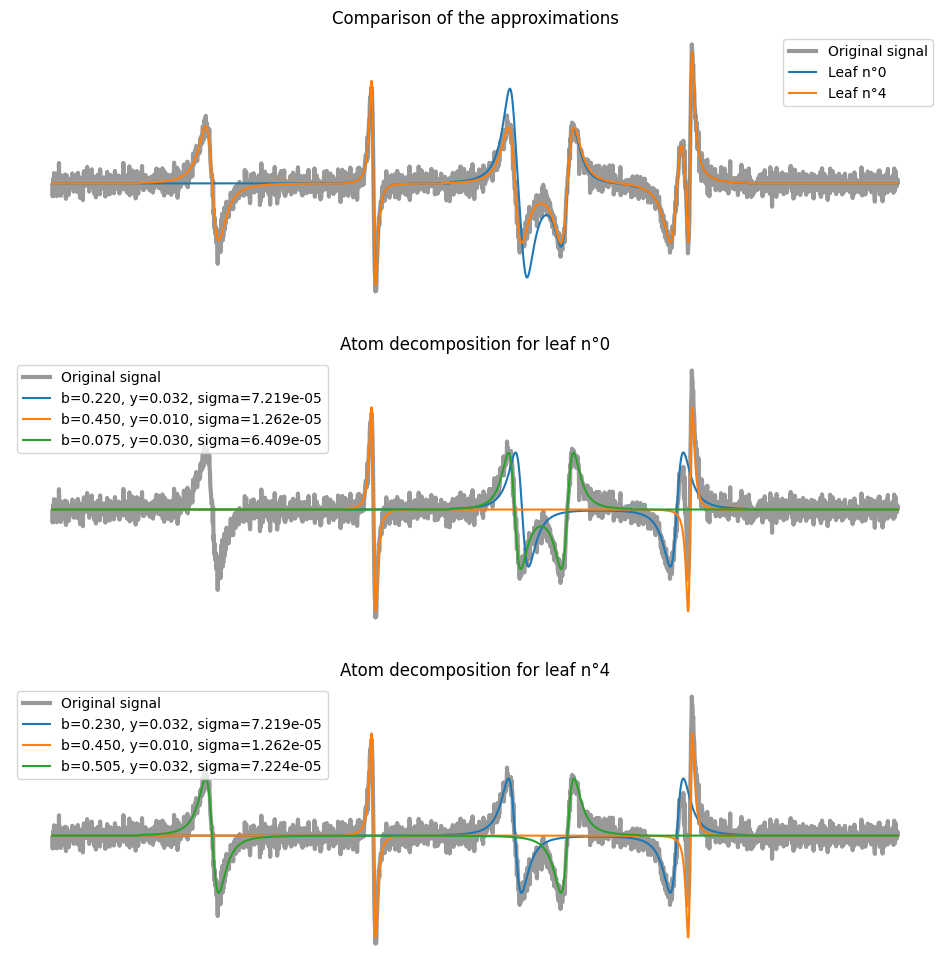

In [6]:
mmp_tree.plotLeavesComparisonFromIdx(0, 4)

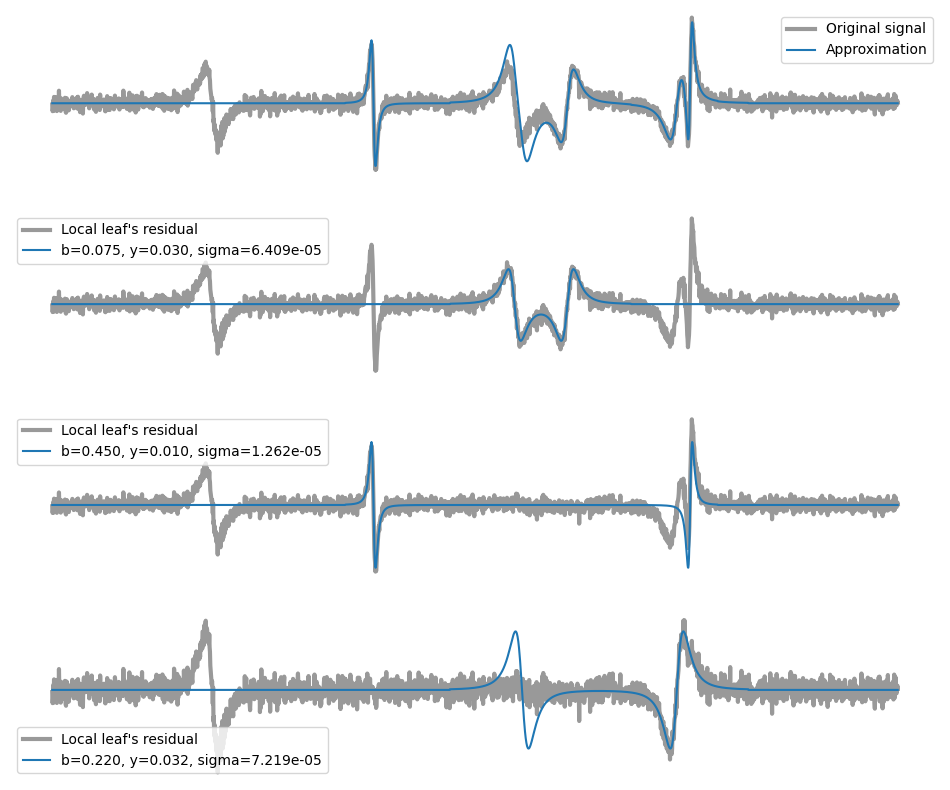

In [7]:
mmp_tree.plotLeafDecomposition(0)

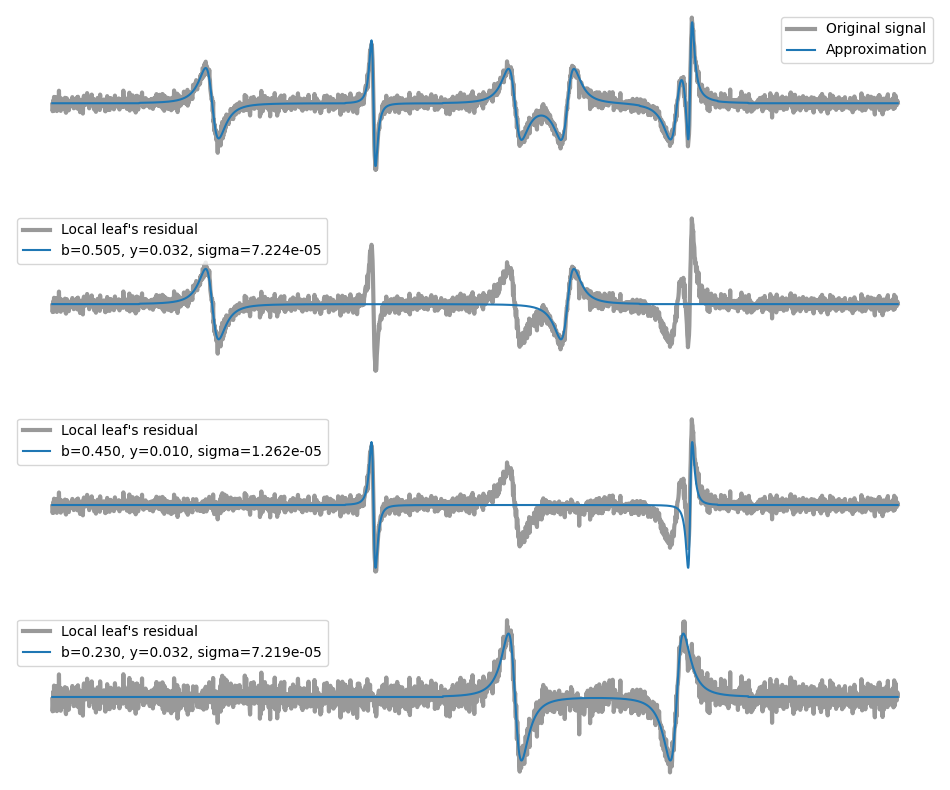

In [8]:
mmp_tree.plotLeafDecomposition(4)

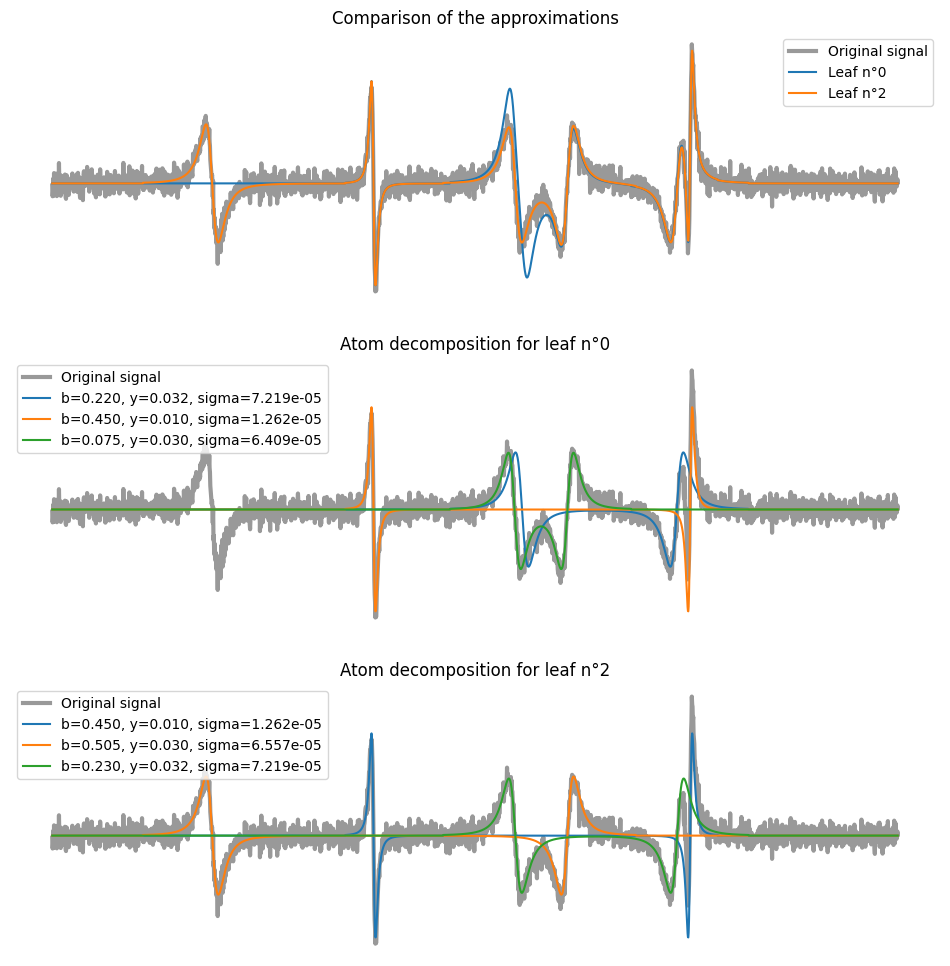

In [9]:
mmp_tree.plotOMPComparison()